In [1]:
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

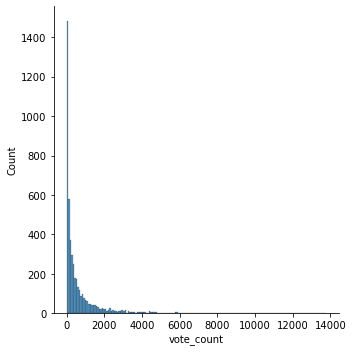

In [4]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
sns.displot(df['vote_count'])

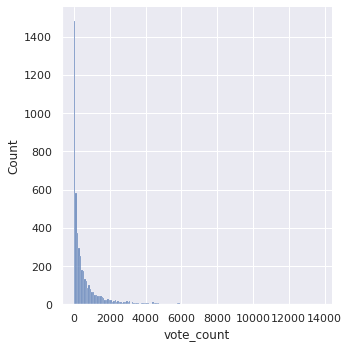

In [5]:
sns.set()
sns.displot(df['vote_count'])

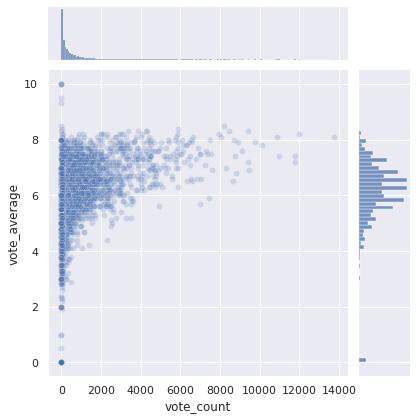

In [6]:
sns.jointplot(x='vote_count', y='vote_average', data=df, alpha=0.2)

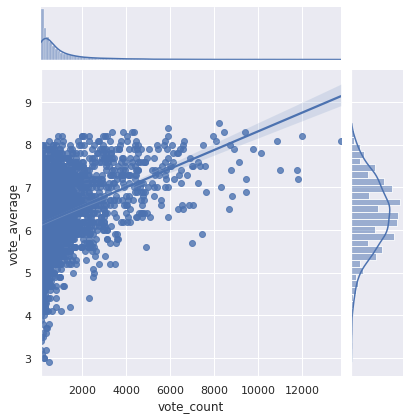

In [7]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
df = df[df['vote_count'] > 100]
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='reg')

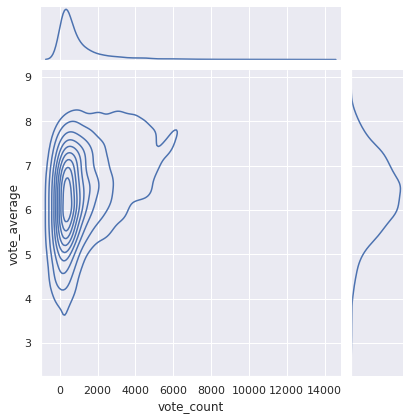

In [8]:
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='kde')

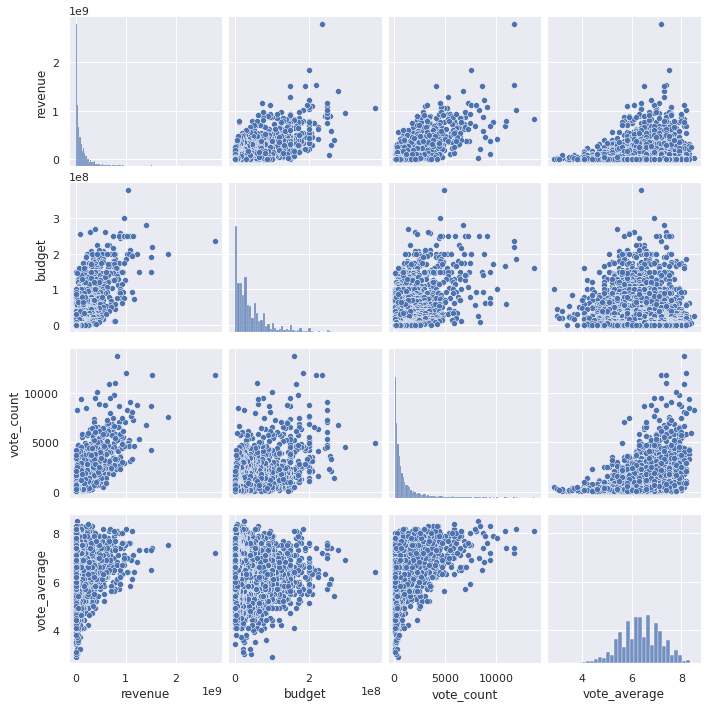

In [9]:
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average']])

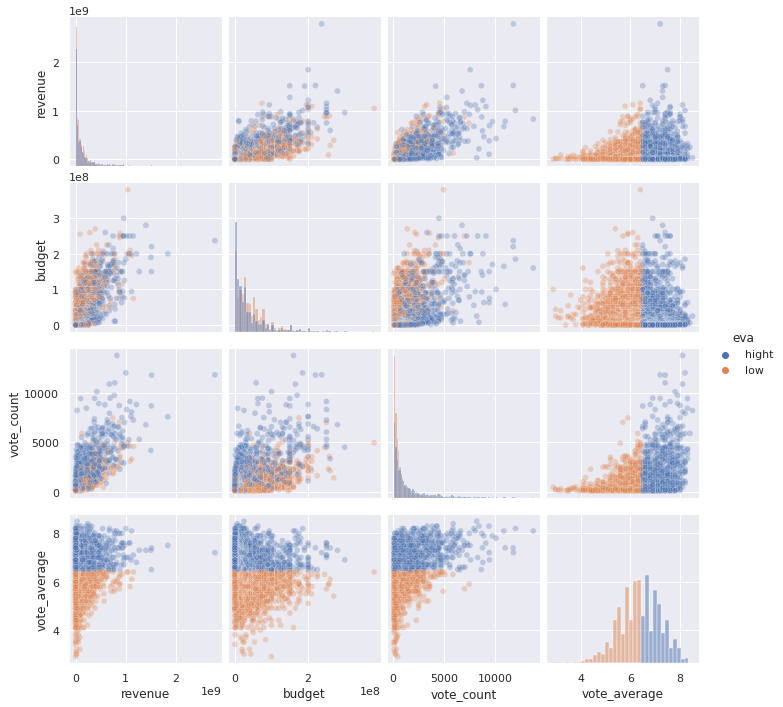

In [12]:
df['eva']=df['vote_average'].apply(lambda x: 'hight' if x > df['vote_average'].median() else 'low')
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average', 'eva']],
            hue='eva',
            plot_kws={'alpha':0.3},
            diag_kind='hist')

<AxesSubplot:xlabel='eva', ylabel='revenue'>

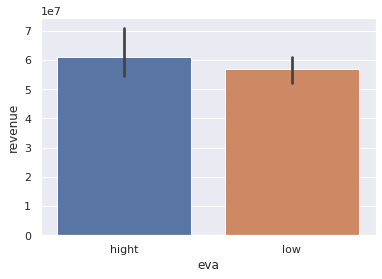

In [15]:
sns.barplot(x='eva', y='revenue', data=df, estimator=np.median)

In [16]:
df['year'] = df['release_date'].apply(lambda x : x[:4])

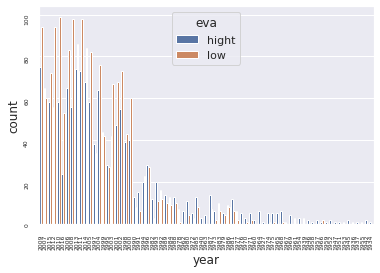

In [20]:
ax = sns.countplot(x='year', data=df, hue='eva')
ax.tick_params(rotation=90, labelsize=6)

In [21]:
df['decade'] = df['release_date'].apply(lambda x : x[:3] + '0s')

<AxesSubplot:xlabel='decade', ylabel='count'>

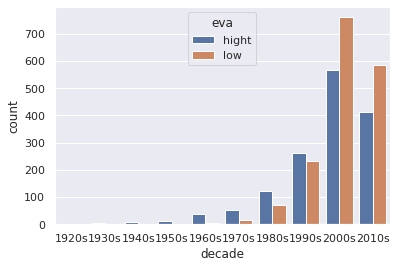

In [27]:
sns.countplot(x='decade', data=df.sort_values('decade'), hue='eva')

<AxesSubplot:xlabel='decade', ylabel='vote_average'>

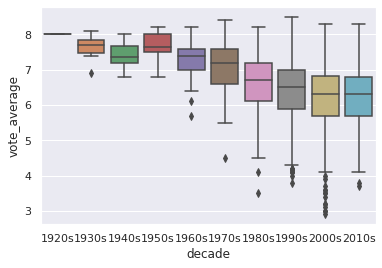

In [28]:
sns.boxplot(x='decade', y='vote_average', data=df.sort_values('decade'))

<AxesSubplot:xlabel='decade', ylabel='vote_average'>

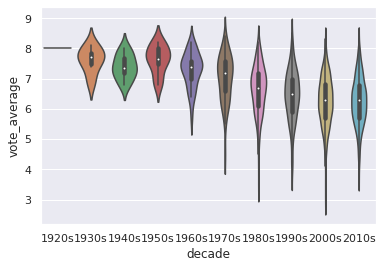

In [30]:
sns.violinplot(x='decade', y='vote_average', data=df.sort_values('decade'))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 51.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 78.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 89.7% of the points 

<AxesSubplot:xlabel='decade', ylabel='vote_average'>

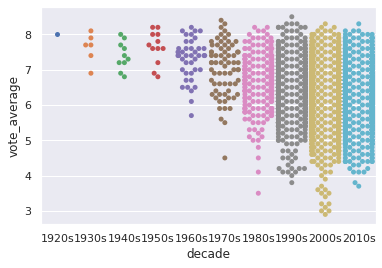

In [31]:
sns.swarmplot(x='decade', y='vote_average', data=df.sort_values('decade'))

<AxesSubplot:xlabel='decade', ylabel='vote_average'>

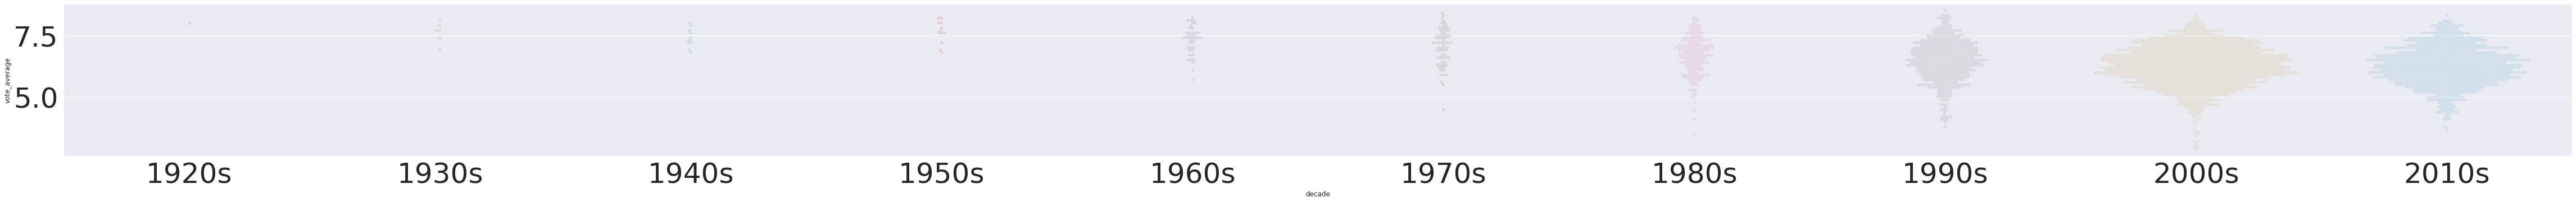

In [65]:
fig, ax = plt.subplots(figsize=(80, 5))
ax.tick_params(labelsize=50)
sns.swarmplot(ax=ax, x='decade', y='vote_average', data=df.sort_values('decade'), alpha=0.2, s=5)

In [69]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
df.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


In [70]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [75]:
df = df[(df != 0).all(axis=1)]
df.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.015819,0.431744,0.705306,0.229712,-0.035757,0.539997
id,0.015819,1.000000,0.180645,0.031826,-0.034371,-0.050815,0.109066
popularity,0.431744,0.180645,1.000000,0.602122,0.182388,0.288189,0.749005
revenue,0.705306,0.031826,0.602122,1.000000,0.233236,0.188014,0.756143
runtime,0.229712,-0.034371,0.182388,0.233236,1.000000,0.386199,0.258101
vote_average,-0.035757,-0.050815,0.288189,0.188014,0.386199,1.000000,0.380825
vote_count,0.539997,0.109066,0.749005,0.756143,0.258101,0.380825,1.000000


<AxesSubplot:>

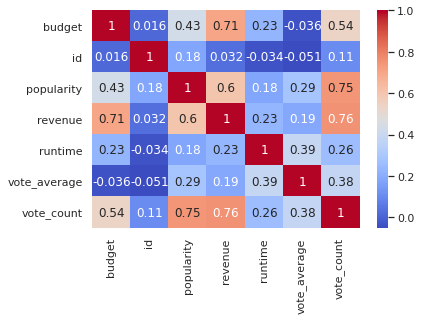

In [79]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [92]:
df['year'] = df['release_date'].apply(lambda y: y[:4])
df['month'] = df['release_date'].apply(lambda m: m[5:7])
revenue_df = df.groupby(['year', 'month']).mean()[['revenue']].pivot_table(values='revenue', index='month', columns='year')
revenue_df

year,1916,1925,1927,1929,1930,1932,1933,1934,1935,1936,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
month,,,,,,,,,,,,,,,,,,,,,
01,NaN,NaN,650422.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.635086e+07,8.548517e+07,6.712600e+07,4.440869e+07,8.108325e+07,1.114278e+08,7.105923e+07,9.265205e+07,3.897096e+07,1.104857e+08
02,NaN,NaN,NaN,4358000.0,NaN,NaN,2240500.0,4500000.0,NaN,8500000.0,...,7.749721e+07,1.103606e+08,6.743382e+07,1.030667e+08,7.436204e+07,1.072104e+08,9.485649e+07,1.268837e+08,1.377840e+08,1.132806e+08
03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.490862e+07,2.999256e+07,1.339757e+08,1.676966e+08,9.179089e+07,1.838416e+08,1.722818e+08,2.292273e+08,1.693319e+08,2.198517e+08
04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.758093e+07,1.365654e+08,9.335484e+07,1.262502e+08,1.650838e+08,2.000062e+08,1.894902e+08,1.526641e+08,3.651596e+08,3.031371e+08
05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.892281e+08,2.466259e+08,2.880007e+08,1.435772e+08,2.198116e+08,1.833446e+08,1.478546e+08,3.271891e+08,2.034467e+08,2.747345e+08
06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.486575e+08,2.470743e+08,2.012255e+08,2.247627e+08,2.986074e+08,2.625915e+08,3.484975e+08,3.533490e+08,4.528977e+08,2.562691e+08
07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.251360e+08,2.527264e+08,2.334799e+08,2.026511e+08,1.262491e+08,2.383139e+08,1.411227e+08,1.919401e+08,1.649625e+08,1.703382e+08
08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.963767e+07,5.439818e+07,9.607047e+07,1.271484e+08,8.856619e+07,7.244234e+07,1.068793e+08,1.328712e+08,7.813557e+07,3.275855e+08
09,8394751.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3202000.0,NaN,...,5.993111e+07,4.608547e+07,4.362178e+07,7.367884e+07,5.038483e+07,9.054040e+07,8.997852e+07,6.541308e+07,1.508724e+08,1.586157e+07


<AxesSubplot:xlabel='year', ylabel='month'>

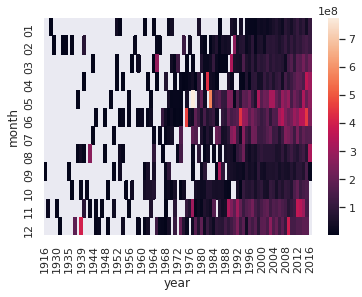

In [90]:
sns.heatmap(revenue_df)

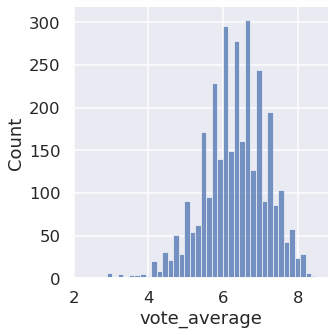

In [97]:
# sns.set(context='talk')
sns.set_context('talk')
sns.displot(df['vote_average'])

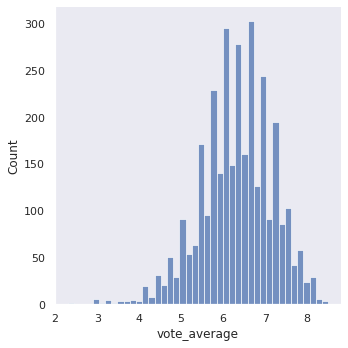

In [103]:
sns.set(style='dark')
sns.displot(df['vote_average'])

In [ ]:
sns.set(context='poster', style='ticks', pallette='dark')


<AxesSubplot:xlabel='decade', ylabel='popularity'>

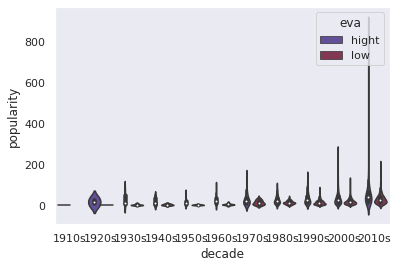

In [116]:
df = df[~df['release_date'].isna()]
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s') 
df['eva'] = df['vote_average'].apply(lambda x: 'hight' if x > df['vote_average'].median() else 'low')

sns.violinplot(x='decade', y='popularity', data=df.sort_values('decade'), hue='eva', palette='twilight')

Text(0.5, 8.95999999999998, 'eva scores')

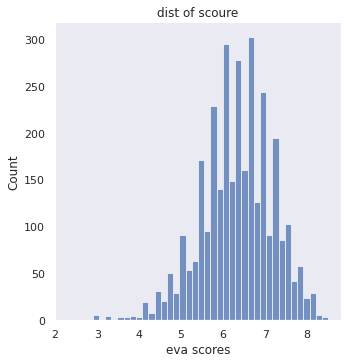

In [118]:
sns.displot(df['vote_average'])
plt.title('dist of scoure')
plt.xlabel('eva scores')

<AxesSubplot:xlabel='popularity', ylabel='Count'>

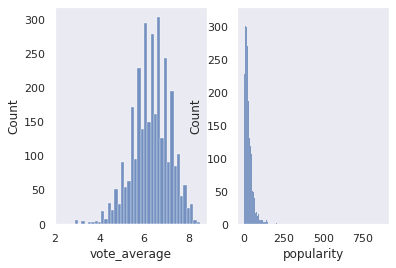

In [129]:
fig, ax = plt.subplots(1, 2)
sns.histplot(df['vote_average'], ax=ax[0])
sns.histplot(df['popularity'], ax=ax[1])

In [121]:
ex[0]

<AxesSubplot:>